In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
%matplotlib inline


In [11]:
total_data = pd.read_csv('sample.csv')
total_data


,Test_Type,Trial_No,Pulse_current_A,Back_ground_current_A,Pulse_frequency_Hz,Pulse_on_percent,Yield_strength_Trial1_MPa,Yield_strength_Trial2_MPa,Yield_strength_Trial3_MPa,Yield_strength_Average_MPa,...,Elongation_Trial3_percent,Elongation_Average_percent,Impact_Strength_Trial1_J,Impact_Strength_Trial2_J,Impact_Strength_Trial3_J,Impact_Strength_Average_J,Micro_hardness_Trial1_Hv,Micro_hardness_Trial2_Hv,Micro_hardness_Trial3_Hv,Micro_hardness_Average_Hv
0,Tensile,1,180,100,4,40,347.76,330.55,344.65,340.98,...,27.23,28.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tensile,2,180,110,6,50,336.56,320.71,327.89,328.38,...,29.21,29.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tensile,3,180,120,8,60,332.80,324.19,338.91,331.96,...,28.87,28.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tensile,4,200,100,6,60,344.38,349.14,352.21,348.57,...,26.34,25.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tensile,5,200,110,8,40,334.22,318.42,337.82,330.15,...,27.36,28.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Tensile,6,200,120,4,50,346.43,323.47,332.40,334.10,...,30.89,31.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Tensile,7,220,100,8,50,360.80,354.96,346.10,353.95,...,30.65,29.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Tensile,8,220,110,6,60,336.76,356.75,361.82,351.77,...,30.17,30.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Tensile,9,220,120,4,40,346.32,350.07,355.21,350.53,...,30.12,30.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Impact,1,180,100,4,40,347.76,330.55,344.65,340.98,...,27.23,28.45,104.0,100.0,96.0,100.0,NaN,NaN,NaN,NaN


In [12]:
tensile_df = total_data[total_data['Test_Type'] == 'Tensile'].copy()
impact_df = total_data[total_data['Test_Type'] == 'Impact'].copy()
hardness_df = total_data[total_data['Test_Type'] == 'Microhardness'].copy()


In [13]:
tensile_df = tensile_df.dropna(axis=1, how='any')
impact_df = impact_df.dropna(axis=1, how='any')
hardness_df = hardness_df.dropna(axis=1, how='any')


In [14]:
impact_df


,Test_Type,Trial_No,Pulse_current_A,Back_ground_current_A,Pulse_frequency_Hz,Pulse_on_percent,Yield_strength_Trial1_MPa,Yield_strength_Trial2_MPa,Yield_strength_Trial3_MPa,Yield_strength_Average_MPa,Elongation_Trial1_percent,Elongation_Trial2_percent,Elongation_Trial3_percent,Elongation_Average_percent,Impact_Strength_Trial1_J,Impact_Strength_Trial2_J,Impact_Strength_Trial3_J,Impact_Strength_Average_J
9,Impact,1,180,100,4,40,347.76,330.55,344.65,340.98,28.96,29.16,27.23,28.45,104.0,100.0,96.0,100.0
10,Impact,2,180,110,6,50,336.56,320.71,327.89,328.38,29.70,29.20,29.21,29.37,103.0,99.0,104.0,102.0
11,Impact,3,180,120,8,60,332.80,324.19,338.91,331.96,28.44,28.22,28.87,28.51,116.0,109.0,118.0,114.0
12,Impact,4,200,100,6,60,344.38,349.14,352.21,348.57,25.50,26.10,26.34,25.98,117.0,106.0,116.0,113.0
13,Impact,5,200,110,8,40,334.22,318.42,337.82,330.15,32.18,26.94,27.36,28.82,106.0,94.0,104.0,101.0
14,Impact,6,200,120,4,50,346.43,323.47,332.40,334.10,31.82,30.40,30.89,31.03,104.0,110.0,101.0,105.0
15,Impact,7,220,100,8,50,360.80,354.96,346.10,353.95,29.22,30.12,30.65,29.99,107.0,115.0,111.0,111.0
16,Impact,8,220,110,6,60,336.76,356.75,361.82,351.77,30.12,29.92,30.17,30.07,117.0,119.0,118.0,118.0
17,Impact,9,220,120,4,40,346.32,350.07,355.21,350.53,28.00,32.28,30.12,30.13,98.0,102.0,106.0,102.0


In [15]:
features = ['Pulse_current_A', 'Back_ground_current_A', 
            'Pulse_frequency_Hz', 'Pulse_on_percent']   ## independent features

targets = {
    'tensile': [
        'Yield_strength_Average_MPa',
        'Ultimate_tensile_strength_Average_MPa',
        'Elongation_Average_percent'
    ],
    'impact': ['Impact_Strength_Average_J'], 
    'hardness': ['Micro_hardness_Average_Hv']
}


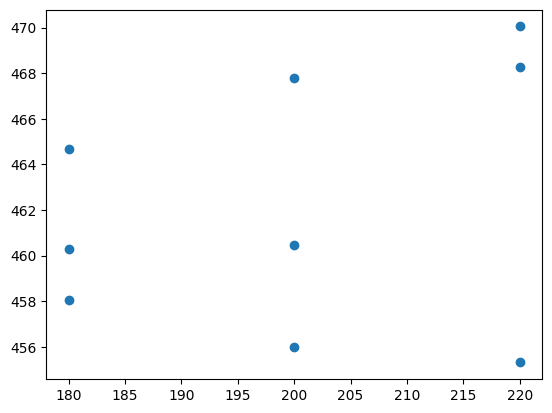

In [16]:
plt.scatter(x=tensile_df['Pulse_current_A'], y=tensile_df['Ultimate_tensile_strength_Average_MPa'])


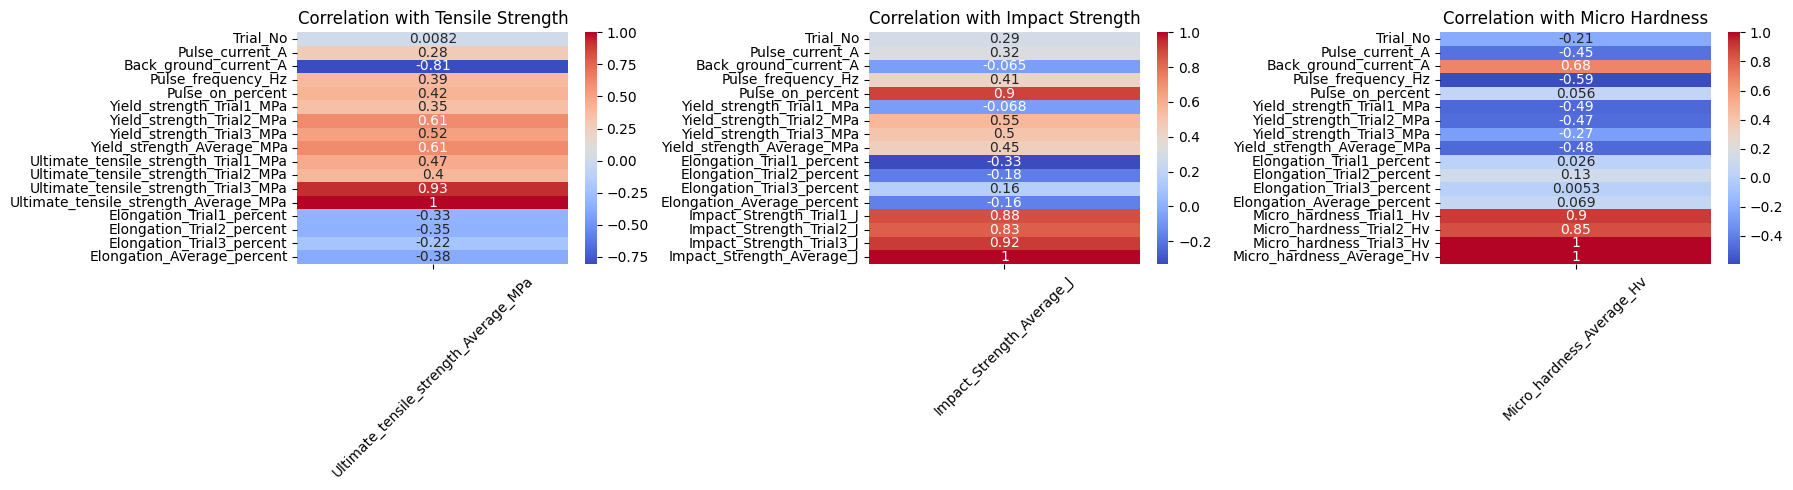

In [17]:
plt.figure(figsize=(18,5))

# Subplot 1 - Tensile Strength
plt.subplot(1,3,1)
corr = tensile_df.select_dtypes(include=['number']).corr()
sns.heatmap(corr[['Ultimate_tensile_strength_Average_MPa']], annot=True, cmap='coolwarm')
plt.title("Correlation with Tensile Strength")
plt.xticks(rotation=45)

# Subplot 2 - Impact Strength
plt.subplot(1,3,2)
corr = impact_df.select_dtypes(include=['number']).corr()
sns.heatmap(corr[['Impact_Strength_Average_J']], annot=True, cmap='coolwarm')
plt.title("Correlation with Impact Strength")
plt.xticks(rotation=45)

# Subplot 3 - Micro Hardness
plt.subplot(1,3,3)
corr = hardness_df.select_dtypes(include=['number']).corr()
sns.heatmap(corr[['Micro_hardness_Average_Hv']], annot=True, cmap='coolwarm')
plt.title("Correlation with Micro Hardness")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [29]:
# Train Linear Regression models individually for each target
data = [('tensile', tensile_df), ('impact', impact_df), ('hardness', hardness_df)]
models = {}
r2_scores = {}

for test, df in data:
    models[test] = {}
    r2_scores[test] = {}
    
    for target in targets[test]:
        X = df[features]
        y = df[target]
        
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        model = LinearRegression()
        model.fit(X_scaled, y)
        
        y_pred = model.predict(X_scaled)
        r2 = r2_score(y, y_pred)
        
        models[test][target] = (model, scaler)
        r2_scores[test][target] = r2

print("R² Scores for Each Target:")
for test, scores in r2_scores.items():
    print(f"\n{test.title()}:")
    for t, score in scores.items():
        print(f"{t}: {score:.2f}")


R² Scores for Each Target:

Tensile:
Yield_strength_Average_MPa: 0.84
Ultimate_tensile_strength_Average_MPa: 0.91
Elongation_Average_percent: 0.49

Impact:
Impact_Strength_Average_J: 0.94

Hardness:
Micro_hardness_Average_Hv: 0.95


In [19]:
tensile_df[tensile_df['Trial_No']==5]['Pulse_current_A'].values[0]


np.int64(200)

 ## Multi Object Optimization

In [20]:
best_score = 0
best_choice = None
best_result = {}

for trial in range(1,10):
    values = [
        tensile_df[tensile_df['Trial_No']==trial]['Pulse_current_A'].values[0],
        tensile_df[tensile_df['Trial_No']==trial]['Back_ground_current_A'].values[0],
        tensile_df[tensile_df['Trial_No']==trial]['Pulse_frequency_Hz'].values[0],
        tensile_df[tensile_df['Trial_No']==trial]['Pulse_on_percent'].values[0]
    ]
    
    tensile_result = tensile_df[tensile_df['Trial_No'] == trial]['Ultimate_tensile_strength_Average_MPa'].values[0]
    impact_result = impact_df[impact_df['Trial_No'] == trial]['Impact_Strength_Average_J'].values[0]
    hardness_result = hardness_df[hardness_df['Trial_No'] == trial]['Micro_hardness_Average_Hv'].values[0]
    
    score = (tensile_result*0.4 + impact_result*0.3 + hardness_result*0.3)
    
    if score > best_score:
        best_score = score
        best_choice = values
        best_result['tensile'] = tensile_result
        best_result['impact'] = impact_result
        best_result['hardness'] = hardness_result


In [21]:
best_choice


[np.int64(220), np.int64(110), np.int64(6), np.int64(60)]

In [22]:
best_result


{'tensile': np.float64(468.28),
 'impact': np.float64(118.0),
 'hardness': np.float64(199.0)}

In [23]:
best_score


np.float64(282.41200000000003)

In [24]:
for trial_number in range(1, 10):
    tensile = tensile_df[tensile_df['Trial_No'] == trial_number]['Ultimate_tensile_strength_Average_MPa'].values[0]
    impact = impact_df[impact_df['Trial_No'] == trial_number]['Impact_Strength_Average_J'].values[0]
    hardness = hardness_df[hardness_df['Trial_No'] == trial_number]['Micro_hardness_Average_Hv'].values[0]
    overall = tensile * 0.4 + impact * 0.3 + hardness * 0.3
    
    print(f"{trial_number:5} | {tensile:7.1f} | {impact:6.1f} | {hardness:7.1f} | {overall:7.1f}")


    1 |   464.7 |  100.0 |   201.0 |   276.2
    2 |   458.1 |  102.0 |   202.0 |   274.4
    3 |   460.3 |  114.0 |   204.0 |   279.5
    4 |   467.8 |  113.0 |   200.0 |   281.0
    5 |   460.4 |  101.0 |   197.0 |   273.6
    6 |   456.0 |  105.0 |   207.0 |   276.0
    7 |   470.1 |  111.0 |   189.0 |   278.0
    8 |   468.3 |  118.0 |   199.0 |   282.4
    9 |   455.3 |  102.0 |   203.0 |   273.6


 ## Visualization

In [30]:
plt.figure(figsize=(10,6))
trial = list(range(1,10))
t_scores = [tensile_df[tensile_df['Trial_No']==i]['Ultimate_tensile_strength_Average_MPa'].values[0] for i in trial]
i_scores = [impact_df[impact_df['Trial_No'] == i]['Impact_Strength_Average_J'].values[0] for i in trial]
h_scores = [hardness_df[hardness_df['Trial_No'] == trial]['Micro_hardness_Average_Hv'].values[0] for i in trial]

total_scores = [t*0.4 + i*0.3 + h*0.3 for t,i,h in zip(t_scores,i_scores,h_scores)]


<Figure size 1000x600 with 0 Axes>

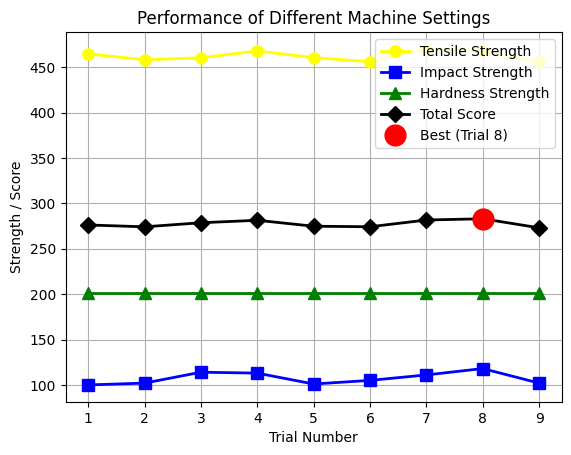

In [26]:
plt.plot(trial, t_scores, 'o-', label='Tensile Strength', linewidth=2, markersize=8, color='yellow')
plt.plot(trial, i_scores, 's-', label='Impact Strength', linewidth=2, markersize=8, color='blue')
plt.plot(trial, h_scores, '^-', label='Hardness Strength', linewidth=2, markersize=8, color='green')
plt.plot(trial, total_scores, 'D-', label='Total Score', linewidth=2, markersize=8, color='black')

best_trial = total_scores.index(max(total_scores)) + 1
plt.plot(best_trial, max(total_scores), 'o', label=f'Best (Trial {best_trial})', linewidth=2, markersize=15, color='red')

plt.xlabel('Trial Number')
plt.ylabel('Strength / Score')
plt.title('Performance of Different Machine Settings')
plt.legend()
plt.grid(True)
plt.xticks(trial)
plt.show()
